In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import shap


In [6]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
print(df.columns)


Index(['customer_id', 'credit_score', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'country_Germany', 'country_Spain'],
      dtype='object')


In [12]:
if 'country' in df.columns:
    df = pd.get_dummies(df, columns=['country'], drop_first=True)
elif 'Country' in df.columns:
    df = pd.get_dummies(df, columns=['Country'], drop_first=True)
else:
    print("No 'country' column found. Skipping one-hot encoding for it.")


No 'country' column found. Skipping one-hot encoding for it.


In [14]:
X = df.drop(['customer_id', 'churn'], axis=1)
y = df['churn']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.77      0.49      0.60       393

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

ROC AUC Score: 0.8568769584720791


<Axes: >

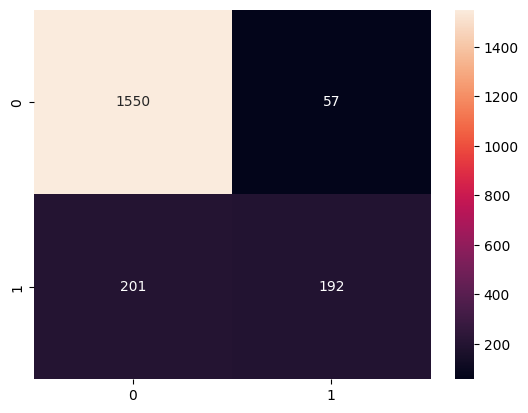

In [17]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")


In [ ]:
X_test_df['churn_proba'] = model.predict_proba(X_test_df)[:, 1]

X_test_df['segment'] = pd.cut(
    X_test_df['churn_proba'],
    bins=[0, 0.2, 0.7, 1.0],
    labels=['Loyal', 'Dormant', 'At Risk']
)

In [ ]:
sns.countplot(data=X_test_df, x='segment')
plt.title('Customer Segments based on Churn Probability')


In [19]:
shap_values = explainer.shap_values(X_test_df)
print(type(shap_values))


<class 'numpy.ndarray'>


C:\Users\yashv\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
C:\Users\yashv\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


<Figure size 640x480 with 0 Axes>

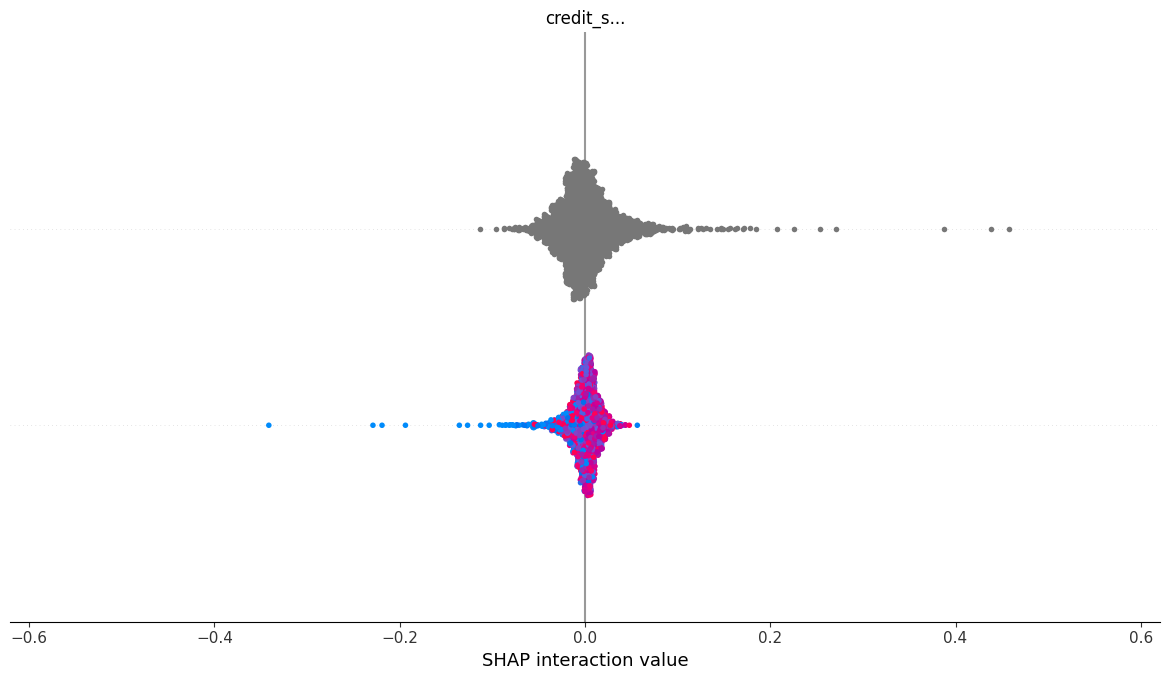

In [20]:
# Create explainer and compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_df)

# Check if shap_values is a list
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_test_df)
else:
    shap.summary_plot(shap_values, X_test_df)


In [21]:
print("SHAP shape:", shap_values[1].shape if isinstance(shap_values, list) else shap_values.shape)
print("X_test shape:", X_test_df.shape)


SHAP shape: (2000, 11, 2)
X_test shape: (2000, 11)
